# <center>Manipulating DataFrames with pandas</center>

[Data Camp Link](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas)

[Chapter 1: Extracting and transforming data](#Chapter-1:-Extracting-and-transforming-data) <br>
[Chapter 2: Advanced indexing](#Chapter-2:-Advanced-indexing) <br>
[Chapter 3: Rearranging and reshaping data](#Chapter-3:-Rearranging-and-reshaping-data) <br>
[Chapter 4: Grouping data](#Chapter-4:-Grouping-data) <br>
[Chapter 5: Bringing it all together](#Chapter-5:-Bringing-it-all-together) 

# Chapter 1: Extracting and transforming data

In [1]:
# all imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Positional and labeled indexing

Given a pair of label-based indices, sometimes it's necessary to find the corresponding positions. In this exercise, you will use the Pennsylvania election results again. The DataFrame is provided for you as `election`.

Find `x` and `y` such that `election.iloc[x, y] == election.loc['Bedford', 'winner']`. That is, what is the row position of `'Bedford'`, and the column position of `'winner'`? Remember that the first position in Python is 0, not 1!

To answer this question, first explore the DataFrame using `election.head()` in the IPython Shell and inspect it with your eyes.

*This course introduces a lot of new concepts, so if you ever need a quick refresher, download the [Pandas Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8) and keep it handy!*

#### Instructions

- Explore the DataFrame in the IPython Shell using `election.head()`.
- Assign the row position of `election.loc['Bedford']` to `x`.
- Assign the column position of `election['winner']` to `y`.
- Hit 'Submit Answer' to print the boolean equivalence of the `.loc` and `.iloc` selections.

In [2]:
# import the dataset and take a look
# county is index column
election = pd.read_csv("data/pennsylvania2012_turnout.csv", index_col = 'county')
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [3]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford', 'winner'])

True


---------

### Indexing and column rearrangement

There are circumstances in which it's useful to modify the order of your DataFrame columns. We do that now by extracting just two columns from the Pennsylvania election results DataFrame.

Your job is to read the CSV file and set the index to `'county'`. You'll then assign a new DataFrame by selecting the list of columns `['winner', 'total', 'voters']`. The CSV file is provided to you in the variable `filename`.

#### Instructions

- Import pandas as pd.
- Read in `filename` using `pd.read_csv()` and set the index to `'county'` by specifying the `index_col` parameter.
- Create a separate DataFrame `results` with the columns `['winner', 'total', 'voters']`.
- Print the output using `results.head()`. This has been done for you, so hit 'Submit Answer' to see the new DataFrame!

In [4]:
# Import pandas
# import pandas as pd

# Read in filename and set the index: election
# election = pd.read_csv(filename, index_col='county')

# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


------

### Slicing rows

The Pennsylvania US election results data set that you have been using so far is ordered by county name. This means that county names can be sliced alphabetically. In this exercise, you're going to perform slicing on the county names of the `election` DataFrame from the previous exercises, which has been pre-loaded for you.

#### Instructions

- Slice the row labels `'Perry'` to `'Potter'` and assign the output to `p_counties`.
- Print the `p_counties` DataFrame. This has been done for you.
- Slice the row labels `'Potter'` to `'Perry'` in reverse order. To do this for hypothetical row labels `'a'` and `'b'`, you could use a stepsize of `-1` like so: `df.loc['b':'a':-1]`.
- Print the `p_counties_rev` DataFrame. This has also been done for you, so hit 'Submit Answer' to see the result of your slicing!

In [5]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry':'Potter',:]

# Print the p_counties DataFrame
print(p_counties)

print("\n")

# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = p_counties.loc['Potter':'Perry':-1]

# Print the p_counties_rev DataFrame
print(p_counties_rev)

             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   

                 margin  
county                   
Perry         38.821272  
Philadelphia  71.172800  
Pike          10.978242  
Potter        45.898681  


             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14

Remember that in that index slicing, the third position after colon is the `step`. 

----------

### Slicing columns

Similar to row slicing, columns can be sliced by value. In this exercise, your job is to slice column names from the Pennsylvania election results DataFrame using `.loc[]`.

It has been pre-loaded for you as `election`, with the index set to `'county'`.

#### Instructions

- Slice the columns from the starting column to `'Obama'` and assign the result to `left_columns`.
- Slice the columns from `'Obama'` to `'winner'` and assign the result to `middle_columns`
- Slice the columns from `'Romney'` to the end and assign the result to `right_columns`
- The code to print the first 5 rows of `left_columns`, `middle_columns`, and `right_columns` has been written, so hit 'Submit Answer' to see the results!

In [6]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:, :'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, 'Obama': 'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:, 'Romney': ]

# Print the output of right_columns.head()
print(right_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


---------

### Subselecting DataFrames with lists

You can use lists to select specific row and column labels with the `.loc[]` accessor. In this exercise, your job is to select the counties `['Philadelphia', 'Centre', 'Fulton']` and the columns `['winner','Obama','Romney']` from the `election` DataFrame, which has been pre-loaded for you with the index set to `'county'`.

#### Instructions

- Create the list of row labels `['Philadelphia', 'Centre', 'Fulton']` and assign it to `rows`.
- Create the list of column labels `['winner', 'Obama', 'Romney']` and assign it to `cols`.
- Create a new DataFrame by selecting with `rows` and `cols` in `.loc[]` and assign it to `three_counties`.
- Print the `three_counties` DataFrame. This has been done for you, so hit 'Submit Answer` to see your new DataFrame.

In [7]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows,cols]

# Print the three_counties DataFrame
three_counties

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486
Fulton,Romney,21.096291,77.748861


-----------

### Thresholding data

In this exercise, we have provided the Pennsylvania election results and included a column called `'turnout'` that contains the percentage of voter turnout per county. Your job is to prepare a boolean array to select all of the rows and columns where voter turnout exceeded 70%.

As before, the DataFrame is available to you as `election` with the index set to `'county'`.

#### Instructions

- Create a boolean array of the condition where the `'turnout'` column is greater than `70` and assign it to `high_turnout`.
- Filter the `election` DataFrame with the `high_turnout` array and assign it to `high_turnout_df`.
- Print the filtered DataFrame. This has been done for you, so hit 'Submit Answer' to see it!

In [8]:
# Create the boolean array: high_turnout
high_turnout = election['turnout'] > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
high_turnout_df

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Forest,PA,2308,38.734835,59.835355,Romney,3232,71.410891,21.100520
Franklin,PA,62802,30.110506,68.583803,Romney,87406,71.850903,38.473297
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390
Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508


------------

### Filtering columns using other columns

The election results DataFrame has a column labeled `'margin'` which expresses the number of extra votes the winner received over the losing candidate. This number is given as a percentage of the total votes cast. It is reasonable to assume that in counties where this margin was less than 1%, the results would be too-close-to-call.

Your job is to use boolean selection to filter the rows where the margin was less than 1. You'll then convert these rows of the `'winner'` column to `np.nan` to indicate that these results are too close to declare a winner.

The DataFrame has been pre-loaded for you as `election`.

#### Instructions

- Import `numpy` as `np`.
- Create a boolean array for the condition where the `'margin'` column is less than 1 and assign it to `too_close`.
- Convert the entries in the `'winner'` column where the result was too close to call to `np.nan`.
- Print the output of `election.info()`. This has been done for you, so hit 'Submit Answer' to see the results.

In [9]:
# Import numpy
# import numpy as np

# Create the boolean array: too_close
too_close = election['margin'] < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

# Print the output of election.info()
print(election.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


-----------

### Filtering using NaNs

In certain scenarios, it may be necessary to remove rows and columns with missing data from a DataFrame. The `.dropna()` method is used to perform this action. You'll now practice using this method on a dataset obtained from [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html), which consists of data from passengers on the Titanic.

The DataFrame has been pre-loaded for you as `titanic`. Explore it in the IPython Shell and you will note that there are many NaNs. You will focus specifically on the `'age'` and `'cabin'` columns in this exercise. Your job is to use `.dropna()` to remove rows where *any* of these two columns contains missing data and rows where *all* of these two columns contain missing data.

You'll also use the `.shape` attribute, which returns the number of rows and columns in a tuple from a DataFrame, or the number of rows from a Series, to see the effect of dropping missing values from a DataFrame.

Finally, you'll use the `thresh=` keyword argument to drop columns from the full dataset that have less than 1000 non-missing values.

#### Instructions

- Select the `'age'` and `'cabin'` columns of `titanic` and create a new DataFrame `df`.
- Print the shape of `df`. This has been done for you.
- Drop rows in `df` with `how='any'` and print the shape.
- Drop rows in `df` with `how='all'` and print the shape.
- Drop columns from the `titanic` DataFrame that have less than 1000 non-missing values by specifying the `thresh` and `axis` keyword arguments. Print the output of `.info()` from this.

In [10]:
# import titanic dataset
titanic = pd.read_csv("data/titanic.csv")

# Select the 'age' and 'cabin' columns: df
df = titanic[['age', 'cabin']]

# Print the shape of df
print(df.shape)

# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)

# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)

# Drop columns in titanic with less than 1000 non-missing values
print(titanic.dropna(thresh=1000, axis='columns').info())

(1309, 2)
(272, 2)
(1069, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB
None


----------

### Using apply() to transform a column

The `.apply()` method can be used on a pandas DataFrame to apply an arbitrary Python function to every element. In this exercise you'll take daily weather data in Pittsburgh in 2013 obtained from [Weather Underground](https://www.wunderground.com/history).

A function to convert degrees Fahrenheit to degrees Celsius has been written for you. Your job is to use the `.apply()` method to perform this conversion on the `'Mean TemperatureF'` and `'Mean Dew PointF'` columns of the `weather` DataFrame.

#### Instructions

- Apply the `to_celsius()` function over the `['Mean TemperatureF','Mean Dew PointF']` columns of the `weather` DataFrame.
- Reassign the column labels of `df_celsius` to `['Mean TemperatureC','Mean Dew PointC']` using the `.columns` attribute.
- Hit 'Submit Answer' to see the new DataFrame with the converted units.

In [11]:
# import the dataset
weather = pd.read_csv("data/pittsburgh2013.csv")

# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)

# Reassign the column labels of df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


--------------

### Using .map() with a dictionary

The `.map()` method is used to transform values according to a Python dictionary look-up. In this exercise you'll practice this method while returning to working with the `election` DataFrame, which has been pre-loaded for you.

Your job is to use a dictionary to map the values `'Obama'` and `'Romney'` in the `'winner'` column to the values `'blue'` and `'red'`, and assign the output to the new column `'color'`.

#### Instructions

- Create a dictionary with the key:value pairs `'Obama':'blue'` and `'Romney':'red'`.
- Use the `.map()` method on the `'winner'` column using the `red_vs_blue` dictionary you created.
- Print the output of `election.head()`. This has been done for you, so hit 'Submit Answer' to see the new column!

In [12]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama': 'blue', 'Romney': 'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election['winner'].map(red_vs_blue)

# Print the output of election.head()
print(election.head())

          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


--------------

### Using vectorized functions

When performance is paramount, you should avoid using `.apply()` and `.map()` because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. By using vectorized functions instead, you can loop over the data at the same speed as compiled code (C, Fortran, etc.)! NumPy, SciPy and pandas come with a variety of vectorized functions (called Universal Functions or UFuncs in NumPy).

You can even write your own vectorized functions, but for now we will focus on the ones distributed by NumPy and pandas.

In this exercise you're going to import the `zscore` function from `scipy.stats` and use it to compute the deviation in voter turnout in Pennsylvania from the mean in fractions of the standard deviation. In statistics, the z-score is the number of standard deviations by which an observation is above the mean - so if it is negative, it means the observation is below the mean.

Instead of using `.apply()` as you did in the earlier exercises, the `zscore` UFunc will take a pandas Series as input and return a NumPy array. You will then assign the values of the NumPy array to a new column in the DataFrame. You will be working with the `election` DataFrame - it has been pre-loaded for you.

#### Instructions

- Import `zscore` from `scipy.stats`.
- Call `zscore` with `election['turnout']` as input .
- Print the output of `type(turnout_zscore)`. This has been done for you.
- Assign `turnout_zscore` to a new column in `election` as `'turnout_zscore'`.
- Print the output of `election.head()`. This has been done for you, so hit 'Submit Answer' to view the result.

In [13]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
election.head()

<class 'numpy.ndarray'>


,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_zscore
county,,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391


------------

# Chapter 2: Advanced indexing

### Changing index of a DataFrame

As you saw in the previous exercise, indexes are immutable objects. This means that if you want to change or modify the index in a DataFrame, then you need to change the whole index. You will do this now, using a list comprehension to create the new index.

A list comprehension is a succinct way to generate a list in one line. For example, the following list comprehension generates a list that contains the cubes of all numbers from 0 to 9: `cubes = [i**3 for i in range(10)]`. This is equivalent to the following code:

`cubes = []
for i in range(10):
    cubes.append(i**3)`

Before getting started, print the `sales` DataFrame in the IPython Shell and verify that the index is given by month abbreviations containing lowercase characters.

*By the way, if you haven't downloaded it already, check out the [Pandas Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8). It includes an overview of the most important concepts, functions and methods and might come in handy if you ever need a quick refresher!*

#### Instructions

- Create a list `new_idx` with the same elements as in `sales.index`, but with all characters capitalized.
- Assign `new_idx` to `sales.index`.
- Print the `sales` dataframe. This has been done for you, so hit 'Submit Answer' and to see how the index changed.

In [14]:
# creat the sales dataframe
sales_dict = {'eggs': {'Apr': 77,
  'Feb': 110,
  'Jan': 47,
  'Jun': 205,
  'Mar': 221,
  'May': 132},
 'salt': {'Apr': 87.0,
  'Feb': 50.0,
  'Jan': 12.0,
  'Jun': 60.0,
  'Mar': 89.0,
  'May': np.nan},
 'spam': {'Apr': 20, 'Feb': 31, 'Jan': 17, 'Jun': 55, 'Mar': 72, 'May': 52}}

sales = pd.DataFrame(sales_dict)

# Create the list of new indexes: new_idx
new_idx = [x.lower() for x in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
sales

,eggs,salt,spam
apr,77,87.0,20
feb,110,50.0,31
jan,47,12.0,17
jun,205,60.0,55
mar,221,89.0,72
may,132,NaN,52


------------

### Changing index name labels

Notice that in the previous exercise, the index was not labeled with a name. In this exercise, you will set its name to `'MONTHS'`.

Similarly, if all the columns are related in some way, you can provide a label for the set of columns.

To get started, print the `sales` DataFrame in the IPython Shell and verify that the index has no name, only its data (the month names).

#### Instructions

- Assign the string `'MONTHS'` to `sales.index.name` to create a name for the index.
- Print the `sales` dataframe to see the index name you just created.
- Now assign the string `'PRODUCTS'` to `sales.columns.name` to give a name to the set of columns.
- Print the `sales` dataframe again to see the columns name you just created.

In [15]:
sales.head()

,eggs,salt,spam
apr,77,87.0,20
feb,110,50.0,31
jan,47,12.0,17
jun,205,60.0,55
mar,221,89.0,72


In [16]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

# Print the sales DataFrame
print(sales)

print("\n")

# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

# Print the sales dataframe again
print(sales)

        eggs  salt  spam
MONTHS                  
apr       77  87.0    20
feb      110  50.0    31
jan       47  12.0    17
jun      205  60.0    55
mar      221  89.0    72
may      132   NaN    52


PRODUCTS  eggs  salt  spam
MONTHS                    
apr         77  87.0    20
feb        110  50.0    31
jan         47  12.0    17
jun        205  60.0    55
mar        221  89.0    72
may        132   NaN    52


-----------

### Building an index, then a DataFrame

You can also build the DataFrame and index independently, and then put them together. If you take this route, be careful, as any mistakes in generating the DataFrame or the index can cause the data and the index to be aligned incorrectly.

In this exercise, the `sales` DataFrame has been provided for you without the month index. Your job is to build this index separately and then assign it to the `sales` DataFrame. Before getting started, print the `sales` DataFrame in the IPython Shell and note that it's missing the month information.

#### Instructions

- Generate a list `months` with the data `['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']`. This has been done for you.
- Assign `months` to `sales.index`.
- Print the modified `sales` dataframe and verify that you now have month information in the index.

In [17]:
sales_dict = {'eggs': {0: 47, 1: 110, 2: 221, 3: 77, 4: 132, 5: 205},
 'salt': {0: 12.0, 1: 50.0, 2: 89.0, 3: 87.0, 4: np.nan, 5: 60.0},
 'spam': {0: 17, 1: 31, 2: 72, 3: 20, 4: 52, 5: 55}}

sales = pd.DataFrame(sales_dict)

In [18]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months

# Print the modified sales DataFrame
print(sales)

     eggs  salt  spam
Jan    47  12.0    17
Feb   110  50.0    31
Mar   221  89.0    72
Apr    77  87.0    20
May   132   NaN    52
Jun   205  60.0    55


----------

### Extracting data with a MultiIndex

In the video, Dhavide explained the concept of a hierarchical index, or a MultiIndex. You will now practice working with these types of indexes.

The `sales` DataFrame you have been working with has been extended to now include State information as well. In the IPython Shell, print the new `sales` DataFrame to inspect the data. Take note of the MultiIndex!

Extracting elements from the outermost level of a `MultiIndex` is just like in the case of a single-level `Index`. You can use the `.loc[]` accessor as Dhavide demonstrated in the video.

#### Instructions

- Print `sales.loc[['CA', 'TX']]`. Note how New York is excluded.
- Print `sales['CA':'TX']`. Note how New York is included.

In [19]:
sales2_dict = {'eggs': {('CA', 1): 47,
  ('CA', 2): 110,
  ('NY', 1): 221,
  ('NY', 2): 77,
  ('TX', 1): 132,
  ('TX', 2): 205},
 'salt': {('CA', 1): 12.0,
  ('CA', 2): 50.0,
  ('NY', 1): 89.0,
  ('NY', 2): 87.0,
  ('TX', 1): np.nan,
  ('TX', 2): 60.0},
 'spam': {('CA', 1): 17,
  ('CA', 2): 31,
  ('NY', 1): 72,
  ('NY', 2): 20,
  ('TX', 1): 52,
  ('TX', 2): 55}}

sales = pd.DataFrame(sales2_dict)
sales

eggs  salt  spam
CA 1    47  12.0    17
   2   110  50.0    31
NY 1   221  89.0    72
   2    77  87.0    20
TX 1   132   NaN    52
   2   205  60.0    55

In [20]:
# Print sales.loc[['CA', 'TX']]
print(sales.loc[['CA', 'TX']])

print("\n")

# Print sales['CA':'TX']
print(sales.loc['CA':'TX'])

      eggs  salt  spam
CA 1    47  12.0    17
   2   110  50.0    31
TX 1   132   NaN    52
   2   205  60.0    55


      eggs  salt  spam
CA 1    47  12.0    17
   2   110  50.0    31
NY 1   221  89.0    72
   2    77  87.0    20
TX 1   132   NaN    52
   2   205  60.0    55


-----------

### Setting & sorting a MultiIndex

In the previous exercise, the MultiIndex was created and sorted for you. Now, you're going to do this yourself! With a MultiIndex, you should always ensure the index is sorted. You can skip this only if you know the data is already sorted on the index fields.

To get started, print the pre-loaded `sales` DataFrame in the IPython Shell to verify that there is no MultiIndex.

#### Instructions

- Create a MultiIndex by setting the index to be the columns `['state', 'month']`.
- Sort the MultiIndex using the `.sort_index()` method.
- Print the `sales` DataFrame. This has been done for you, so hit 'Submit Answer' to verify that indeed you have an index with the fields `state` and `month`!

In [21]:
sales_dict = {'eggs': {0: 47, 1: 110, 2: 221, 3: 77, 4: 132, 5: 205},
 'month': {0: 1, 1: 2, 2: 1, 3: 2, 4: 1, 5: 2},
 'salt': {0: 12.0, 1: 50.0, 2: 89.0, 3: 87.0, 4: np.nan, 5: 60.0},
 'spam': {0: 17, 1: 31, 2: 72, 3: 20, 4: 52, 5: 55},
 'state': {0: 'CA', 1: 'CA', 2: 'NY', 3: 'NY', 4: 'TX', 5: 'TX'}}

sales = pd.DataFrame(sales_dict)
sales.head()

,eggs,month,salt,spam,state
0,47,1,12.0,17,CA
1,110,2,50.0,31,CA
2,221,1,89.0,72,NY
3,77,2,87.0,20,NY
4,132,1,NaN,52,TX


In [22]:
# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

# Sort the MultiIndex: sales
sales = sales.sort_index()

# Print the sales DataFrame
print(sales)

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


-------------

### Using .loc[] with nonunique indexes

As Dhavide mentioned in the video, it is always preferable to have a meaningful index that uniquely identifies each row. Even though pandas does not require unique index values in DataFrames, it works better if the index values are indeed unique. To see an example of this, you will index your `sales` data by `'state'` in this exercise.

As always, begin by printing the `sales` DataFrame in the IPython Shell and inspecting it.

#### Instructions

- Set the index of `sales` to be the column `'state'`.
- Print the `sales` DataFrame to verify that indeed you have an index with `state` values.
- Access the data from `'NY'` and print it to verify that you obtain two rows.

In [23]:
sales_dict = {'eggs': {0: 47, 1: 110, 2: 221, 3: 77, 4: 132, 5: 205},
 'month': {0: 1, 1: 2, 2: 1, 3: 2, 4: 1, 5: 2},
 'salt': {0: 12.0, 1: 50.0, 2: 89.0, 3: 87.0, 4: np.nan, 5: 60.0},
 'spam': {0: 17, 1: 31, 2: 72, 3: 20, 4: 52, 5: 55},
 'state': {0: 'CA', 1: 'CA', 2: 'NY', 3: 'NY', 4: 'TX', 5: 'TX'}}

sales = pd.DataFrame(sales_dict)
sales.head()

,eggs,month,salt,spam,state
0,47,1,12.0,17,CA
1,110,2,50.0,31,CA
2,221,1,89.0,72,NY
3,77,2,87.0,20,NY
4,132,1,NaN,52,TX


In [24]:
# Set the index to the column 'state': sales
sales = sales.set_index('state')

# Print the sales DataFrame
print(sales)

print('\n')

# Access the data from 'NY'
print(sales.loc['NY'])

       eggs  month  salt  spam
state                         
CA       47      1  12.0    17
CA      110      2  50.0    31
NY      221      1  89.0    72
NY       77      2  87.0    20
TX      132      1   NaN    52
TX      205      2  60.0    55


       eggs  month  salt  spam
state                         
NY      221      1  89.0    72
NY       77      2  87.0    20


----------

### Indexing multiple levels of a MultiIndex

Looking up indexed data is fast and efficient. And you have already seen that lookups based on the outermost level of a `MultiIndex` work just like lookups on DataFrames that have a single-level `Index`.

Looking up data based on inner levels of a `MultiIndex` can be a bit trickier. The trickiest of all these lookups are when you want to access some inner levels of the index. In this case, you need to use `slice(None)` in the slicing parameter for the outermost dimension(s) instead of the usual :, or use `pd.IndexSlice`. You can refer to the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/advanced.html) for more details. For example, in the video, Dhavide used the following code to extract rows from all Symbols for the dates Oct. 3rd through 4th inclusive:

`stocks.loc[(slice(None), slice('2016-10-03', '2016-10-04')), :]`

Pay particular attention to the tuple `(slice(None), slice('2016-10-03', '2016-10-04'))`.

In this exercise, you will use your `sales` DataFrame to do some increasingly complex lookups. Remember that you can type `sales.head()` in the console to review the structure of the DataFrame!

#### Instructions

- Look up data for New York (`'NY'`) in month `1` in the `sales` DataFrame.
- Look up data for California and Texas (`'CA'`, `'TX'`) in month `2`.
- Access the inner index `month` and look up data for all states in month `2`. Use `(slice(None), 2)` to extract all rows in month `2`.

In [25]:
sales_dict = {'eggs': {('CA', 1): 47,
  ('CA', 2): 110,
  ('NY', 1): 221,
  ('NY', 2): 77,
  ('TX', 1): 132,
  ('TX', 2): 205},
 'salt': {('CA', 1): 12.0,
  ('CA', 2): 50.0,
  ('NY', 1): 89.0,
  ('NY', 2): 87.0,
  ('TX', 1): np.nan,
  ('TX', 2): 60.0},
 'spam': {('CA', 1): 17,
  ('CA', 2): 31,
  ('NY', 1): 72,
  ('NY', 2): 20,
  ('TX', 1): 52,
  ('TX', 2): 55}}

sales = pd.DataFrame(sales_dict)
sales

eggs  salt  spam
CA 1    47  12.0    17
   2   110  50.0    31
NY 1   221  89.0    72
   2    77  87.0    20
TX 1   132   NaN    52
   2   205  60.0    55

In [26]:
# Look up data for NY in month 1 in sales: NY_month1
NY_month1 = sales.loc[('NY',1)]

# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA', 'TX'], 2), :]

# Access the inner month index and look up data for all states in month 2: all_month2
all_month2 = sales.loc[(slice(None), 2), :]

Note for the structure. If you want 1 outer index and 1 inner index structure is `sales.loc[('NY', 1)]`. Also note that, inner index is `integer` type therefore you do not need to use `''` for that.

----------

# Chapter 3: Rearranging and reshaping data

### Pivoting a single variable

Suppose you started a blog for a band, and you would like to log how many visitors you have had, and how many signed-up for your newsletter. To help design the tours later, you track where the visitors are. A DataFrame called `users` consisting of this information has been pre-loaded for you.

Inspect `users` in the IPython Shell and make a note of which variable you want to use to index the rows (`'weekday'`), which variable you want to use to index the columns (`'city'`), and which variable will populate the values in the cells (`'visitors'`). Try to visualize what the result should be.

For example, in the video, Dhavide used `'treatment'` to index the rows, `'gender'` to index the columns, and `'response'` to populate the cells. Prior to pivoting, the DataFrame looked like this:

       id treatment gender  response
    0   1         A      F         5
    1   2         A      M         3
    2   3         B      F         8
    3   4         B      M         9

After pivoting:

    gender     F  M
    treatment      
    A          5  3
    B          8  9

In this exercise, your job is to pivot `users` so that the focus is on `'visitors'`, with the columns indexed by `'city'` and the rows indexed by `'weekday'`.

#### Instructions

- Pivot the `users` DataFrame with the rows indexed by `'weekday'`, the columns indexed by `'city'`, and the values populated with `'visitors'`.
- Print the pivoted DataFrame. This has been done for you, so hit 'Submit Answer' to view the result.

In [27]:
users_dict = {'city': {0: 'Austin', 1: 'Dallas', 2: 'Austin', 3: 'Dallas'},
 'signups': {0: 7, 1: 12, 2: 3, 3: 5},
 'visitors': {0: 139, 1: 237, 2: 326, 3: 456},
 'weekday': {0: 'Sun', 1: 'Sun', 2: 'Mon', 3: 'Mon'}}

users = pd.DataFrame(users_dict)
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


In [28]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday', columns ='city', values='visitors')

# Print the pivoted DataFrame
print(visitors_pivot)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


----------

### Pivoting all variables

If you do not select any particular variables, all of them will be pivoted. In this case - with the `users` DataFrame - both `'visitors'` and `'signups'` will be pivoted, creating hierarchical column labels.

You will explore this for yourself now in this exercise.

#### Instructions

- Pivot the `users` DataFrame with the `'signups'` indexed by `'weekday'` in the rows and `'city'` in the columns.
- Print the new DataFrame. This has been done for you.
- Pivot the `users` DataFrame with both `'signups'` and `'visitors'` pivoted - that is, all the variables. This will happen automatically if you do not specify an argument for the `values` parameter of `.pivot()`.
- Print the pivoted DataFrame. This has been done for you, so hit 'Submit Answer' to see the result.

In [29]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index='weekday', columns='city', values='signups')

# Print signups_pivot
print(signups_pivot)

print("\n")

# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index='weekday', columns='city')

# Print the pivoted DataFrame
print(pivot)

city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12


        signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237


------------

### Stacking & unstacking I

You are now going to practice stacking and unstacking DataFrames. The `users` DataFrame you have been working with in this chapter has been pre-loaded for you, this time with a MultiIndex. Explore it in the IPython Shell to see the data layout. Pay attention to the index, and notice that the index levels are `['city', 'weekday']`. So `'weekday'` - the second entry - has position 1. This position is what corresponds to the `level` parameter in `.stack()` and `.unstack()` calls. Alternatively, you can specify `'weekday'` as the level instead of its position.

Your job in this exercise is to unstack `users` by `'weekday'`. You will then use `.stack()` on the unstacked DataFrame to see if you get back the original layout of `users`.

#### Instructions

- Define a DataFrame `byweekday` with the `'weekday'` level of `users` unstacked.
- Print the `byweekday` DataFrame to see the new data layout. This has been done for you.
- Stack `byweekday` by `'weekday'` and print it to check if you get the same layout as the original `users` DataFrame.

In [30]:
users_dict = {'signups': {('Austin', 'Mon'): 3,
  ('Austin', 'Sun'): 7,
  ('Dallas', 'Mon'): 5,
  ('Dallas', 'Sun'): 12},
 'visitors': {('Austin', 'Mon'): 326,
  ('Austin', 'Sun'): 139,
  ('Dallas', 'Mon'): 456,
  ('Dallas', 'Sun'): 237}}

users = pd.DataFrame(users_dict)

users.index.names = ['city', 'weekday']

users

signups  visitors
city   weekday                   
Austin Mon            3       326
       Sun            7       139
Dallas Mon            5       456
       Sun           12       237

In [31]:
# Unstack users by 'weekday': byweekday
byweekday = users.unstack(level=1)

# Print the byweekday DataFrame
print(byweekday)

print("\n")

# Stack byweekday by 'weekday' and print it
print(byweekday.stack('weekday'))

        signups     visitors     
weekday     Mon Sun      Mon  Sun
city                             
Austin        3   7      326  139
Dallas        5  12      456  237


                signups  visitors
city   weekday                   
Austin Mon            3       326
       Sun            7       139
Dallas Mon            5       456
       Sun           12       237


---------------

### Stacking & unstacking II

You are now going to continue working with the `users` DataFrame. As always, first explore it in the IPython Shell to see the layout and note the index.

Your job in this exercise is to unstack and then stack the `'city'` level, as you did previously for `'weekday'`. Note that you won't get the same DataFrame.

#### Instructions

- Define a DataFrame `bycity` with the `'city'` level of `users` unstacked.
- Print the `bycity` DataFrame to see the new data layout. This has been done for you.
- Stack `bycity` by `'city'` and print it to check if you get the same layout as the original `users` DataFrame.

In [32]:
users

signups  visitors
city   weekday                   
Austin Mon            3       326
       Sun            7       139
Dallas Mon            5       456
       Sun           12       237

In [33]:
# Unstack users by 'city': bycity
bycity = users.unstack('city')

# Print the bycity DataFrame
print(bycity)

# Stack bycity by 'city' and print it
print(bycity.stack('city'))

        signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237
                signups  visitors
weekday city                     
Mon     Austin        3       326
        Dallas        5       456
Sun     Austin        7       139
        Dallas       12       237


--------

### Restoring the index order

Continuing from the previous exercise, you will now use `.swaplevel(0, 1)` to flip the index levels. Note they won't be sorted. To sort them, you will have to follow up with a `.sort_index()`. You will then obtain the original DataFrame. Note that an unsorted index leads to slicing failures.

To begin, print both `users` and `bycity` in the IPython Shell. The goal here is to convert `bycity` back to something that looks like `users`.

#### Instructions

- Define a DataFrame `newusers` with the `'city'` level stacked back into the index of `bycity`.
- Swap the levels of the index of `newusers`.
- Print `newusers` and verify that the index is not sorted. This has been done for you.
- Sort the index of `newusers`.
- Print `newusers` and verify that the index is now sorted. This has been done for you.
- Assert that `newusers` equals `users`. This has been done for you, so hit 'Submit Answer' to see the result.

In [34]:
# Stack 'city' back into the index of bycity: newusers
newusers = bycity.stack('city')

# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0,1)

# Print newusers and verify that the index is not sorted
print(newusers)

# Sort the index of newusers: newusers
newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
print(newusers)

print('\n')

# Verify that the new DataFrame is equal to the original
print(newusers.equals(users))

                signups  visitors
city   weekday                   
Austin Mon            3       326
Dallas Mon            5       456
Austin Sun            7       139
Dallas Sun           12       237
                signups  visitors
city   weekday                   
Austin Mon            3       326
       Sun            7       139
Dallas Mon            5       456
       Sun           12       237


True


---------

### Adding names for readability

You are now going to practice melting DataFrames. A DataFrame called `visitors_by_city_weekday` has been pre-loaded for you. Explore it in the IPython Shell and see that it is the `users` DataFrame from previous exercises with the rows indexed by `'weekday'`, columns indexed by `'city'`, and values populated with `'visitors'`.

Recall from the video that the goal of melting is to restore a pivoted DataFrame to its original form, or to change it from a wide shape to a long shape. You can explicitly specify the columns that should remain in the reshaped DataFrame with `id_vars`, and list which columns to convert into values with `value_vars`. As Dhavide demonstrated, if you don't pass a name to the values in `pd.melt()`, you will lose the name of your variable. You can fix this by using the `value_name` keyword argument.

Your job in this exercise is to melt `visitors_by_city_weekday` to move the city names from the column labels to values in a single column called `'city'`. If you were to use just `pd.melt(visitors_by_city_weekday)`, you would obtain the following result:

         city   value
    0  weekday   Mon
    1  weekday   Sun
    2   Austin   326
    3   Austin   139
    4   Dallas   456
    5   Dallas   237

Therefore, you have to specify the `id_vars` keyword argument to ensure that `'weekday'` is retained in the reshaped DataFrame, and the `value_name` keyword argument to change the name of `value` to `visitors`.

#### Instructions

- Reset the index of `visitors_by_city_weekday` with `.reset_index()`.
- Print `visitors_by_city_weekday` and verify that you have just a range index, 0, 1, 2, 3. This has been done for you.
- Melt `visitors_by_city_weekday` to move the city names from the column labels to values in a single column called `visitors`.
- Print `visitors` to check that the city values are in a single column now and that the dataframe is longer and skinnier.

In [35]:
visitors_by_city_weekday = {'Austin': {'Mon': 326, 'Sun': 139}, 'Dallas': {'Mon': 456, 'Sun': 237}}

visitors_by_city_weekday = pd.DataFrame(visitors_by_city_weekday)

visitors_by_city_weekday.index.name = 'weekday'
visitors_by_city_weekday.columns.name = 'city'
visitors_by_city_weekday

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [36]:
# Reset the index: visitors_by_city_weekday
visitors_by_city_weekday = visitors_by_city_weekday.reset_index() 

# Print visitors_by_city_weekday
print(visitors_by_city_weekday)

# Melt visitors_by_city_weekday: visitors
visitors = pd.melt(visitors_by_city_weekday, id_vars='weekday', value_name='visitors')

# Print visitors
print(visitors)

city weekday  Austin  Dallas
0        Mon     326     456
1        Sun     139     237
  weekday    city  visitors
0     Mon  Austin       326
1     Sun  Austin       139
2     Mon  Dallas       456
3     Sun  Dallas       237


-------

### Going from wide to long

You can move multiple columns into a single column (making the data long and skinny) by "melting" multiple columns. In this exercise, you will practice doing this.

The `users` DataFrame has been pre-loaded for you. As always, explore it in the IPython Shell and note the index.

#### Instructions

- Define a DataFrame `skinny` where you melt the `'visitors'` and `'signups'` columns of `users` into a single column.
- Print `skinny` to verify the results. Note the `value` column that had the cell values in `users`.

In [37]:
users_dict = {'city': {0: 'Austin', 1: 'Dallas', 2: 'Austin', 3: 'Dallas'},
 'signups': {0: 7, 1: 12, 2: 3, 3: 5},
 'visitors': {0: 139, 1: 237, 2: 326, 3: 456},
 'weekday': {0: 'Sun', 1: 'Sun', 2: 'Mon', 3: 'Mon'}}

users = pd.DataFrame(users_dict)
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


In [38]:
# Melt users: skinny
skinny = users.melt(id_vars=['weekday', 'city'])

# Print skinny
print(skinny)

  weekday    city  variable  value
0     Sun  Austin   signups      7
1     Sun  Dallas   signups     12
2     Mon  Austin   signups      3
3     Mon  Dallas   signups      5
4     Sun  Austin  visitors    139
5     Sun  Dallas  visitors    237
6     Mon  Austin  visitors    326
7     Mon  Dallas  visitors    456


-------

### Obtaining key-value pairs with melt()

Sometimes, all you need is some key-value pairs, and the context does not matter. If said context is in the index, you can easily obtain what you want. For example, in the `users` DataFrame, the `visitors` and `signups` columns lend themselves well to being represented as key-value pairs. So if you created a hierarchical index with `'city'` and `'weekday'` columns as the index, you can easily extract key-value pairs for the `'visitors'` and `'signups'` columns by melting `users` and specifying `col_level=0`.

#### Instructions

- Set the index of `users` to `['city', 'weekday']`.
- Print the DataFrame `users_idx` to see the new index.
- Obtain the key-value pairs corresponding to visitors and signups by melting `users_idx` with the keyword argument `col_level=0`.

In [39]:
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


In [40]:
# Set the new index: users_idx
users_idx = users.set_index(['city', 'weekday'])

# Print the users_idx DataFrame
print(users_idx)

print("\n")

# Obtain the key-value pairs: kv_pairs
kv_pairs = users_idx.melt(col_level=0)

# Print the key-value pairs
print(kv_pairs)

                signups  visitors
city   weekday                   
Austin Sun            7       139
Dallas Sun           12       237
Austin Mon            3       326
Dallas Mon            5       456


   variable  value
0   signups      7
1   signups     12
2   signups      3
3   signups      5
4  visitors    139
5  visitors    237
6  visitors    326
7  visitors    456


--------

### Setting up a pivot table

Recall from the video that a pivot table allows you to see all of your variables as a function of two other variables. In this exercise, you will use the `.pivot_table()` method to see how the `users` DataFrame entries appear when presented as functions of the `'weekday'` and `'city'` columns. That is, with the rows indexed by `'weekday'` and the columns indexed by `'city'`.

Before using the pivot table, print the `users` DataFrame in the IPython Shell and observe the layout.

#### Instructions

- Use a pivot table to index the rows of `users` by `'weekday'` and the columns of `users` by `'city'`. These correspond to the `index` and `columns` parameters of `.pivot_table()`.
- Print `by_city_day`. This has been done for you, so hit 'Submit Answer' to see the result.

In [41]:
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


In [42]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index='weekday',\
                          columns='city')

# Print by_city_day
print(by_city_day)

        signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237


---------

### Using other aggregations in pivot tables

You can also use aggregation functions within a pivot table by specifying the `aggfunc` parameter. In this exercise, you will practice using the `'count'` and `len` aggregation functions - which produce the same result - on the `users` DataFrame.

#### Instructions

- Define a DataFrame `count_by_weekday1` that shows the count of each column with the parameter `aggfunc='count'`. The index here is `'weekday'`.
- Print `count_by_weekday1`. This has been done for you.
- Replace `aggfunc='count'` with `aggfunc=len` and verify you obtain the same result.

In [43]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday',\
                                      aggfunc = 'count')

# Print count_by_weekday
print(count_by_weekday1)

# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday',\
                                      aggfunc = len)

# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))

         city  signups  visitors
weekday                         
Mon         2        2         2
Sun         2        2         2
True


---------

### Using margins in pivot tables

Sometimes it's useful to add totals in the margins of a pivot table. You can do this with the argument `margins=True`. In this exercise, you will practice using margins in a pivot table along with a new aggregation function: `sum`.

The `users` DataFrame, which you are now probably very familiar with, has been pre-loaded for you.

#### Instructions

- Define a DataFrame `signups_and_visitors` that shows the breakdown of signups and visitors by day.
    - You will need to use `aggfunc=sum` to do this.
- Print `signups_and_visitors`. This has been done for you.
- Now pass the additional argument `margins=True` to the `.pivot_table()` method to obtain the totals.
- Print `signups_and_visitors_total`. This has been done for you, so hit 'Submit Answer' to see the result.

In [44]:
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


In [45]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)

# Print signups_and_visitors
print(signups_and_visitors)

print('\n')

# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index='weekday', margins=True, aggfunc=sum)

# Print signups_and_visitors_total
print(signups_and_visitors_total)

         signups  visitors
weekday                   
Mon            8       782
Sun           19       376


         signups  visitors
weekday                   
Mon            8       782
Sun           19       376
All           27      1158


---------

# Chapter 4: Grouping data

### Grouping by multiple columns

In this exercise, you will return to working with the Titanic dataset from Chapter 1 and use `.groupby()` to analyze the distribution of passengers who boarded the Titanic.

The `'pclass'` column identifies which class of ticket was purchased by the passenger and the `'embarked'` column indicates at which of the three ports the passenger boarded the Titanic. `'S'` stands for Southampton, England, `'C'` for Cherbourg, France and `'Q'` for Queenstown, Ireland.

Your job is to first group by the `'pclass'` column and count the number of rows in each class using the `'survived'` column. You will then group by the `'embarked'` and `'pclass'` columns and count the number of passengers.

The DataFrame has been pre-loaded as `titanic`.

#### Instructions

- Group by the `'pclass'` column and save the result as `by_class`.
- Aggregate the `'survived'` column of `by_class` using `.count()`. Save the result as `count_by_class`.
- Print `count_by_class`. This has been done for you.
- Group `titanic` by the `'embarked'` and `'pclass'` columns. Save the result as `by_mult`.
- Aggregate the `'survived'` column of `by_mult` using `.count()`. Save the result as `count_mult`.
- Print `count_mult`. This has been done for you, so hit 'Submit Answer' to view the result.

In [46]:
# import Titanic dataset
titanic = pd.read_csv("data/titanic.csv")
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

print("\n")

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked', 'pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
print(count_mult)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64


embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


-------

### Grouping by another series

In this exercise, you'll use two data sets from [Gapminder.org](http://gapminder.org/) to investigate the average life expectancy (in years) at birth in 2010 for the 6 continental regions. To do this you'll read the life expectancy data per country into one pandas DataFrame and the association between country and region into another.

By setting the index of both DataFrames to the country name, you'll then use the region information to group the countries in the life expectancy DataFrame and compute the mean value for 2010.

The life expectancy CSV file is available to you in the variable `life_fname` and the regions filename is available in the variable `regions_fname`.

#### Instructions

- Read `life_fname` into a DataFrame called `life` and set the index to `'Country'`.
- Read `regions_fname` into a DataFrame called `regions` and set the index to `'Country'`.
- Group `life` by the `region` column of `regions` and store the result in `life_by_region`.
- Print the mean over the `2010` column of `life_by_region`.

In [48]:
life_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv'
regions_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv'

# Read life_fname into a DataFrame: life
life = pd.read_csv(life_fname, index_col='Country')

# Read regions_fname into a DataFrame: regions
regions = pd.read_csv(regions_fname, index_col='Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


------

### Computing multiple aggregates of multiple columns

The `.agg()` method can be used with a tuple or list of aggregations as input. When applying multiple aggregations on multiple columns, the aggregated DataFrame has a *multi-level column index*.

In this exercise, you're going to group passengers on the Titanic by `'pclass'` and aggregate the `'age'` and `'fare'` columns by the functions `'max'` and `'median'`. You'll then use multi-level selection to find the oldest passenger per class and the median fare price per class.

The DataFrame has been pre-loaded as `titanic`.

#### Instructions

- Group `titanic` by `'pclass'` and save the result as `by_class`.
- Select the `'age'` and `'fare'` columns from `by_class` and save the result as `by_class_sub`.
- Aggregate `by_class_sub` using `'max'` and `'median'`. You'll have to pass `'max'` and `'median'` in the form of a list to `.agg()`.
- Use `.loc[]` to print all of the rows and the column specification `('age','max')`. This has been done for you.
- Use `.loc[]` to print all of the rows and the column specification `('fare','median')`.

In [49]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max', 'median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

print('\n')

# Print the median fare in each class
print(aggregated.loc[:, ('fare', 'median')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64


pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


In [50]:
aggregated

age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

As you can see `aggregated.loc[:, ('fare', 'median')]` means that all rows, and `fare>median` column of the dataset. The second part is `MultiIndex`. Notice how to access that part of `aggregation` dataset.

-----------

### Aggregating on index levels/fields

If you have a DataFrame with a multi-level row index, the individual levels can be used to perform the groupby. This allows advanced aggregation techniques to be applied along one or more levels in the index and across one or more columns.

In this exercise you'll use the full Gapminder dataset which contains yearly values of life expectancy, population, child mortality (per 1,000) and per capita gross domestic product (GDP) for every country in the world from 1964 to 2013.

Your job is to create a multi-level DataFrame of the columns `'Year'`, `'Region'` and `'Country'`. Next you'll group the DataFrame by the `'Year'` and `'Region'` levels. Finally, you'll apply a dictionary aggregation to compute the total population, spread of per capita GDP values and average child mortality rate.

The Gapminder CSV file is available as `'gapminder.csv'`.

#### Instructions

- Read `'gapminder.csv'` into a DataFrame with `index_col=['Year','region','Country']`. Sort the index.
- Group `gapminder` with a level of `['Year','region']` using its `level` parameter. Save the result as `by_year_region`.
- Define the function `spread` which returns the maximum and minimum of an input series. This has been done for you.
- Create a dictionary with `'population':'sum'`, `'child_mortality':'mean'` and `'gdp':spread` as aggregator. This has been done for you.
- Use the `aggregator` dictionary to aggregate `by_year_region`. Save the result as `aggregated`.
- Print the last 6 entries of `aggregated`. This has been done for you, so hit 'Submit Answer' to view the result.

In [51]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv("data/gapminder_tidy.csv", \
                        index_col=['Year', 'region', 'Country']).sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level = ['Year', 'region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))

                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


----------

### Grouping on a function of the index

Groupby operations can also be performed on transformations of the index values. In the case of a DateTimeIndex, we can extract portions of the datetime over which to group.

In this exercise you'll read in a set of sample sales data from February 2015 and assign the `'Date'` column as the index. Your job is to group the sales data by the day of the week and aggregate the sum of the `'Units'` column.

Is there a day of the week that is more popular for customers? To find out, you're going to use `.strftime('%a')` to transform the index datetime values to abbreviated days of the week.

The sales data CSV file is available to you as `'sales.csv'`.

#### Instructions

- Read `'sales.csv'` into a DataFrame with `index_col='Date'` and `parse_dates=True`.
- Create a groupby object with `sales.index.strftime('%a')` as input and assign it to `by_day`.
- Aggregate the `'Units'` column of `by_day` with the `.sum()` method. Save the result as `units_sum`.
- Print `units_sum`. This has been done for you, so hit 'Submit Answer' to see the result.

In [52]:
# Read file: sales
sales = pd.read_csv("data/sales-feb-2015.csv", index_col = 'Date', parse_dates = True)

# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
print(units_sum)

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64


`sales.index.strftime('%a')` access the index of `sales` dataframe and pull abbreviated weekday (Mon, Tue etc.) out of that `datetime` object.

__For more information:__

[Click here](https://www.programiz.com/python-programming/datetime/strftime)

--------

### Detecting outliers with Z-Scores

As Dhavide demonstrated in the video using the `zscore` function, you can apply a `.transform()` method after grouping to apply a function to groups of data independently. The z-score is also useful to find outliers: a z-score value of +/- 3 is generally considered to be an outlier.

In this example, you're going to normalize the Gapminder data in 2010 for life expectancy and fertility by the *z-score per region*. Using boolean indexing, you will filter for countries that have high fertility rates and low life expectancy for their region.

The Gapminder DataFrame for 2010 indexed by `'Country'` is provided for you as `gapminder_2010`.

#### Instructions

- Import `zscore` from `scipy.stats`.
- Group `gapminder_2010` by `'region'` and transform the `['life','fertility']` columns by `zscore`.
- Construct a boolean Series of the bitwise `or` between `standardized['life'] < -3` and `standardized['fertility'] > 3`.
- Filter `gapminder_2010` using `.loc[]` and the `outliers` Boolean Series. Save the result as `gm_outliers`.
- Print `gm_outliers`. This has been done for you, so hit 'Submit Answer' to see the results.

In [53]:
gapminder = pd.read_csv("data/gapminder_tidy.csv", index_col = 'Country')
gapminder_2010 = gapminder[gapminder['Year'] == 2010]
gapminder_2010.head(2)

,Year,fertility,life,population,child_mortality,gdp,region
Country,,,,,,,
Afghanistan,2010,5.659,59.612,31411743.0,105.0,1637.0,South Asia
Albania,2010,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia


In [54]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life', 'fertility'].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
gm_outliers

,Year,fertility,life,population,child_mortality,gdp,region
Country,,,,,,,
Guatemala,2010,3.974,71.100,14388929.0,34.5,6849.0,America
Haiti,2010,3.350,45.000,9993247.0,208.8,1518.0,America
Tajikistan,2010,3.780,66.830,6878637.0,52.6,2110.0,Europe & Central Asia
Timor-Leste,2010,6.237,65.952,1124355.0,63.8,1777.0,East Asia & Pacific


<div class="alert alert-block alert-info">
<b>Not clear</b> <br> 

Why `standardized['life'] < -3) | (standardized['fertility'] > 3`? Why we do not include the other end such as `standardized['life'] > 3)` for the `life` column. 
</div>

---------

### Filling missing data (imputation) by group

Many statistical and machine learning packages cannot determine the best action to take when missing data entries are encountered. Dealing with missing data is natural in pandas (both in using the default behavior and in defining a custom behavior). In Chapter 1, you practiced using the `.dropna()` method to drop missing values. Now, you will practice imputing missing values. You can use `.groupby()` and `.transform()` to fill missing data appropriately for each group.

Your job is to fill in missing `'age'` values for passengers on the Titanic with the median age from their `'gender'` and `'pclass'`. To do this, you'll group by the `'sex'` and `'pclass'` columns and transform each group with a custom function to call `.fillna()` and *impute* the median value.

The DataFrame has been pre-loaded as `titanic`. Explore it in the IPython Shell by printing the output of `titanic.tail(10)`. Notice in particular the NaNs in the `'age'` column.

#### Instructions

- Group `titanic` by `'sex'` and `'pclass'`. Save the result as `by_sex_class`.
- Write a function called `impute_median()` that fills missing values with the median of a series. This has been done for you.
- Call `.transform()` with `impute_median` on the `'age'` column of `by_sex_class`.
- Print the output of `titanic.tail(10)`. This has been done for you - hit 'Submit Answer' to see how the missing values have now been imputed.

In [55]:
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [56]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex', 'pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = by_sex_class['age'].transform(impute_median)

# Print the output of titanic.tail(10)
print(titanic.tail(10))

      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  25.0   
1303       3         0                    Yousseff, Mr. Gerious    male  25.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  22.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body home.dest  
1299      1      0    2659  14.45

----------

### Other transformations with .apply

The `.apply()` method when used on a groupby object performs an arbitrary function on each of the groups. These functions can be aggregations, transformations or more complex workflows. The `.apply()` method will then combine the results in an intelligent way.

In this exercise, you're going to analyze economic disparity within regions of the world using the Gapminder data set for 2010. To do this you'll define a function to compute the aggregate spread of per capita GDP in each region and the individual country's z-score of the regional per capita GDP. You'll then select three countries - United States, Great Britain and China - to see a summary of the regional GDP and that country's z-score against the regional mean.

The 2010 Gapminder DataFrame is provided for you as `gapminder_2010`. Pandas has been imported as `pd`.

The following function has been defined for your use:

    def disparity(gr):
        # Compute the spread of gr['gdp']: s
        s = gr['gdp'].max() - gr['gdp'].min()
        # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
        z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
        # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
        return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

#### Instructions

- Group `gapminder_2010` by `'region'`. Save the result as `regional`.
- Apply the provided `disparity` function on `regional`, and save the result as `reg_disp`.
- Use `.loc[]` to select `['United States','United Kingdom','China']` from `reg_disp` and print the results.

In [57]:
# create the disparity function
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

gapminder_2010.head(3)

,Year,fertility,life,population,child_mortality,gdp,region
Country,,,,,,,
Afghanistan,2010,5.659,59.612,31411743.0,105.0,1637.0,South Asia
Albania,2010,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia
Algeria,2010,2.817,70.615,35468208.0,27.4,12494.0,Middle East & North Africa


In [58]:
# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
reg_disp.loc[['United States', 'United Kingdom', 'China']]

,z(gdp),regional spread(gdp)
Country,,
United States,3.013374,47855.0
United Kingdom,0.572873,89037.0
China,-0.432756,96993.0


-------------

### Grouping and filtering with .apply()

By using `.apply()`, you can write functions that filter rows within groups. The `.apply()` method will handle the iteration over individual groups and then re-combine them back into a Series or DataFrame.

In this exercise you'll take the Titanic data set and analyze survival rates from the `'C'` deck, which contained the most passengers. To do this you'll group the dataset by `'sex'` and then use the `.apply()` method on a provided user defined function which calculates the mean survival rates on the `'C'` deck:

    def c_deck_survival(gr):

        c_passengers = gr['cabin'].str.startswith('C').fillna(False)

        return gr.loc[c_passengers, 'survived'].mean()

The DataFrame has been pre-loaded as `titanic`.

#### Instructions

- Group `titanic` by `'sex'`. Save the result as `by_sex`.
- Apply the provided `c_deck_survival` function on the `by_sex` DataFrame. Save the result as `c_surv_by_sex`.
- Print `c_surv_by_sex`.

In [59]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [60]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)

sex
female    0.913043
male      0.312500
dtype: float64


Excellent work! It looks like female passengers on the `'C'` deck had a much higher chance of surviving!

-------

### Grouping and filtering with .filter()

You can use groupby with the `.filter()` method to remove whole groups of rows from a DataFrame based on a boolean condition.

In this exercise, you'll take the February sales data and remove entries from companies that purchased less than or equal to 35 Units in the whole month.

First, you'll identify how many units each company bought for verification. Next you'll use the `.filter()` method after grouping by `'Company'` to remove all rows belonging to companies whose sum over the `'Units'` column was less than or equal to 35. Finally, verify that the three companies whose total Units purchased were less than or equal to 35 have been filtered out from the DataFrame.

#### Instructions

- Group `sales` by `'Company'`. Save the result as `by_company`.
- Compute and print the sum of the `'Units'` column of `by_company`.
- Call `.filter()` on `by_company` with `lambda g:g['Units'].sum() > 35` as input and print the result.

In [61]:
sales.head(2)

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9


In [62]:
# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

print('\n')

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g: g['Units'].sum() > 35)
print(by_com_filt)

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64


                       Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4


---------

### Filtering and grouping with .map()

You have seen how to group by a column, or by multiple columns. Sometimes, you may instead want to group by a function/transformation of a column. The key here is that the Series is indexed the same way as the DataFrame. You can also mix and match column grouping with Series grouping.

In this exercise your job is to investigate survival rates of passengers on the Titanic by `'age'` and `'pclass'`. In particular, the goal is to find out what fraction of children under 10 survived in each `'pclass'`. You'll do this by first creating a boolean array where `True` is passengers under 10 years old and `False` is passengers over 10. You'll use `.map()` to change these values to strings.

Finally, you'll group by the under 10 series and the `'pclass'` column and aggregate the `'survived'` column. The `'survived'` column has the value 1 if the passenger survived and 0 otherwise. The mean of the `'survived'` column is the fraction of passengers who lived.

The DataFrame has been pre-loaded for you as `titanic`.

#### Instructions

- Create a Boolean Series of `titanic['age'] < 10` and call `.map` with `{True:'under 10', False:'over 10'}`.
- Group `titanic `by the `under10` Series and then compute and print the mean of the `'survived'` column.
- Group `titanic` by the `under10` Series as well as the `'pclass'` column and then compute and print the mean of the `'survived'` column.

In [63]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

print('\n')

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64


age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


Understand the **`map({True:'under 10', False:'over 10'})`** function here. Instead of `True` and `False`, we assign `string` values to those `mask` variable.

----------

# Chapter 5: Bringing it all together

### Grouping and aggregating

The Olympic medal data for the following exercises comes from [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data). It comprises records of all events held at the Olympic games between 1896 and 2012.

Suppose you have loaded the data into a DataFrame `medals`. You now want to find the total number of medals awarded to the USA per edition. To do this, filter the `'USA'` rows and use the `groupby()` function to put the `'Edition'` column on the index:

`USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')`

Given the goal of finding the total number of USA medals awarded per edition, what column should you select and which aggregation method should you use?

#### Instructions

- `USA_edition_grouped['City'].mean()`
- `USA_edition_grouped['Athlete'].sum()`
- **`USA_edition_grouped['Medal'].count()`**
- `USA_edition_grouped['Gender'].first()`

In [64]:
medals = pd.read_csv("data/all_medalists.csv")
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [65]:
# create a new dataframe with USA only and grouped by Edition or Year.
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

# access 'Medal' column and .count() function of it
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

-----------

### Using .value_counts() for ranking

For this exercise, you will use the pandas Series method `.value_counts()` to determine the top 15 countries ranked by total number of medals.

Notice that `.value_counts()` sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

The DataFrame has been pre-loaded for you as `medals`.

#### Instructions

- Extract the `'NOC'` column from the DataFrame `medals` and assign the result to `country_names`. Notice that this Series has repeated entries for every medal (of *any* type) a country has won in any Edition of the Olympics.
- Create a Series `medal_counts` by applying `.value_counts()` to the Series `country_names`.
- Print the top 15 countries ranked by total number of medals won. This has been done for you, so hit 'Submit Answer' to see the result.

In [66]:
# Select the 'NOC' column of medals: country_names
country_names = medals.loc[:, 'NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


-----------

### Using .pivot_table() to count medals by type

Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a *pivot table* to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In this exercise, you will use `.pivot_table()` first to aggregate the total medals by type. Then, you can use `.sum()` along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

#### Instructions

- Construct a pivot table `counted` from the DataFrame `medals`, aggregating by `'count'`. Use `'NOC'` as the index, `'Athlete'` for the values, and `'Medal'` for the columns.
- Modify the DataFrame `counted` by adding a column `counted['totals']`. The new column `'totals'` should contain the result of taking the sum along the columns (i.e., use `.sum(axis='columns')`).
- Overwrite the DataFrame `counted` by sorting it with the `.sort_values()` method. Specify the keyword argument `ascending=False`.
- Print the first 15 rows of `counted` using `.head(15)`. This has been done for you, so hit 'Submit Answer' to see the result.

In [67]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC',columns='Medal',\
                            values='Athlete', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis=1)
# or
# counted['totals'] = counted['Bronze'] + counted['Gold'] + counted['Silver']

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


---------

### Applying .drop_duplicates()

What could be the difference between the `'Event_gender'` and `'Gender'` columns? You should be able to evaluate your guess by looking at the unique values of the pairs `(Event_gender, Gender)` in the data. In particular, you should not see something like `(Event_gender='M', Gender='Women')`. However, you will see that, strangely enough, there is an observation with `(Event_gender='W', Gender='Men')`.

The duplicates can be dropped using the `.drop_duplicates()` method, leaving behind the unique observations. The DataFrame has been loaded as `medals`.

#### Instructions

- Select the columns `'Event_gender'` and `'Gender'`.
- Create a dataframe `ev_gen_uniques` containing the unique pairs contained in `ev_gen`.
- Print `ev_gen_uniques`. This has been done for you, so hit 'Submit Answer' to see the result.

In [68]:
medals.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


In [69]:
# Select columns: ev_gen
ev_gen = medals.loc[:, ['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


-----------

### Finding possible errors with .groupby()

You will now use `.groupby()` to continue your exploration. Your job is to group by `'Event_gender'` and `'Gender'` and count the rows.

You will see that there is only one suspicious row: This is likely a data error.

The DataFrame is available to you as `medals`.

#### Instructions

- Group `medals` by `'Event_gender'` and `'Gender'`.
- Create a `medal_count_by_gender` DataFrame with a group count using the `.count()` method.
- Print `medal_count_by_gender`. This has been done for you, so hit 'Submit Answer' to view the result.

In [70]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

-------

### Locating suspicious data

You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

#### Instructions

- Create a Boolean Series with a condition that captures the only row that has `medals.Event_gender == 'W'` and `medals.Gender == 'Men'`. Be sure to use the `&` operator.
- Use the Boolean Series to create a DataFrame called `suspect` with the suspicious row.
- Print `suspect`. This has been done for you, so hit 'Submit Answer' to see the result.

In [71]:
# Create the Boolean Series: sus
sus = ((medals['Event_gender'] == 'W') & (medals['Gender'] == 'Men'))

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


---------

### Using .nunique() to rank by distinct sports

You may want to know which countries won medals in the most distinct sports. The `.nunique()` method is the principal aggregation here. Given a categorical Series `S`, `S.nunique()` returns the number of distinct categories.

#### Instructions

- Group `medals` by `'NOC'`.
- Compute the number of distinct sports in which each country won medals. To do this, select the `'Sport'` column from `country_grouped` and apply `.nunique()`.
- Sort `Nsports` in descending order with `.sort_values()` and `ascending=False`.
- Print the first 15 rows of `Nsports`. This has been done for you, so hit 'Submit Answer' to see the result.

In [72]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


Well done! Interestingly, the __USSR__ is not in the top 5 in this category, while the USA continues to remain on top. What could be the cause of this? You'll compare the medal counts of __USA vs. USSR__ more closely in the next two exercises to find out!

**EXAMPLES** <br>
Some examples of `.nunique()`.

In [73]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
df

,A,B
0,1,1
1,2,1
2,3,1


In [74]:
df.nunique()

A    3
B    1
dtype: int64

In [75]:
df.nunique(axis=1)

0    1
1    2
2    2
dtype: int64

----------

### Counting USA vs. USSR Cold War Olympic Sports

The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame `medals` by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as `medals`, are `'USA'` & `'URS'`.

#### Instructions

- Using `medals`, create a Boolean Series called `during_cold_war` that is `True` when `'Edition'` is `>=` `1952` and `<=` `1988`.
- Using `medals`, create a Boolean Series called `is_usa_urs` that is `True` when `'NOC'` is either `'USA'` or `'URS'`.
- Filter the `medals` DataFrame using `during_cold_war` and `is_usa_urs` to create a new DataFrame called `cold_war_medals`.
- Group `cold_war_medals` by `'NOC'`.
- Create a Series `Nsports` from `country_grouped` using indexing & chained methods:
    - Extract the column `'Sport'`.
    - Use `.nunique()` to get the number of unique elements in each group;
    - Apply `.sort_values(ascending=False)` to rearrange the Series.
- Print the final Series `Nsports`. This has been done for you, so hit 'Submit Answer' to see the result!

In [76]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


As you can see, the __USSR__ is actually higher than the __US__ when you look only at the Olympic competitions between 1952 and 1988!

---------------

### Counting USA vs. USSR Cold War Olympic Medals

For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

- You'll need a pivot table with years (`'Edition'`) on the index and countries (`'NOC'`) on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a `NaN` in that entry of the pivot table.
- You'll need to slice the Cold War period and subset the `'USA'` and `'URS'` columns.
- You'll need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using `.idxmax(axis='columns')`. If `.max()` returns the maximum value of Series or 1D array, `.idxmax()` returns the index of the maximizing element. The argument `axis=columns` or `axis=1` is required because, by default, this aggregation would be done along columns for a DataFrame.
- The final Series contains either `'USA'` or `'URS'` according to which country won the most medals in each Olympic edition. You can use `.value_counts()` to count the number of occurrences of each.

#### Instructions

- Construct `medals_won_by_country` using `medals.pivot_table()`.
    - The index should be the years (`'Edition'`) & the columns should be country (`'NOC'`)
    - The values should be `'Athlete'` (which captures every medal regardless of kind) & the aggregation method should be `'count'` (which captures the total number of medals won).
- Create `cold_war_usa_urs_medals` by slicing the pivot table `medals_won_by_country`. Your slice should contain the editions from years `1952:1988` and only the columns `'USA'` & `'URS'` from the pivot table.
- Create the Series `most_medals` by applying the `.idxmax()` method to `cold_war_usa_urs_medals`. Be sure to use `axis='columns'`.
- Print the result of applying `.value_counts()` to `most_medals`. The result reported gives the number of times each of the USA or the USSR won more Olympic medals in total than the other between 1952 and 1988.

In [77]:
medals.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


In [78]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', \
                                columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


In [79]:
# to understand better see every step
cold_war_usa_urs_medals.head(4)

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0


In [80]:
# use index slicing since it is Pandas Series
most_medals[0:4]

Edition
1952    USA
1956    URS
1960    URS
1964    URS
dtype: object

-------------

### Visualizing USA Medal Counts by Edition: Line Plot

Your job in this exercise is to visualize the medal counts by `'Edition'` for the USA. The DataFrame has been pre-loaded for you as `medals`.

#### Instructions

- Create a DataFrame `usa` with data only for the USA.
- Group `usa` such that `['Edition', 'Medal']` is the index. Aggregate the count over `'Athlete'`.
- Use `.unstack()` with `level='Medal'` to reshape the DataFrame `usa_medals_by_year`.
- Construct a line plot from the final DataFrame `usa_medals_by_year`. This has been done for you, so hit 'Submit Answer' to see the plot!

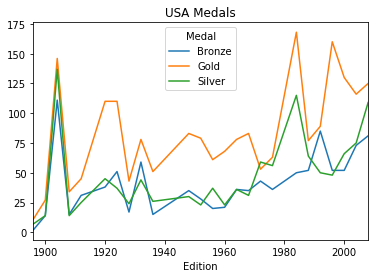

In [81]:
# Create the DataFrame: usa
usa = medals[medals['NOC'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].agg('count')

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level=1)

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.title('USA Medals')
plt.show()

Since we are looking for yearly data. We need to `.unstack()` medal types. It can be seen as below.

In [82]:
# Create the DataFrame: usa
usa = medals[medals['NOC'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].agg('count')

usa_medals_by_year.head(6)

Edition  Medal 
1896     Bronze     2
         Gold      11
         Silver     7
1900     Bronze    14
         Gold      27
         Silver    14
Name: Athlete, dtype: int64

----------------

### Visualizing USA Medal Counts by Edition: Area Plot

As in the previous exercise, your job in this exercise is to visualize the medal counts by `'Edition'` for the USA. This time, you will use an area plot to see the breakdown better. The `usa` DataFrame has been created and all reshaping from the previous exercise has been done. You need to write the plotting command.

#### Instructions

- Create an area plot of `usa_medals_by_year`. This can be done by using `.plot.area()`.

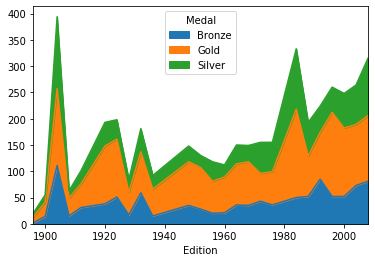

In [83]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

-------------

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: `Bronze` < `Gold` < `Silver`. However, you would prefer an ordering consistent with the Olympic rules: `Bronze` < `Silver` < `Gold`.

You can achieve this using `Categorical` types. In this final exercise, after redefining the `'Medal'` column of the DataFrame `medals`, you will repeat the area plot from the previous exercise to see the new ordering.

#### Instructions

- Redefine the `'Medal'` column of the DataFrame `medals` as an *ordered categorical*. To do this, use `pd.Categorical()` with three keyword arguments:
    - `values = medals.Medal`.
    - `categories=['Bronze', 'Silver', 'Gold']`.
    - `ordered=True`.
    - After this, you can verify that the type has changed using `medals.info()`.
- Plot the final DataFrame `usa_medals_by_year` as an *area plot*. This has been done for you, so hit 'Submit Answer' to see how the plot has changed!

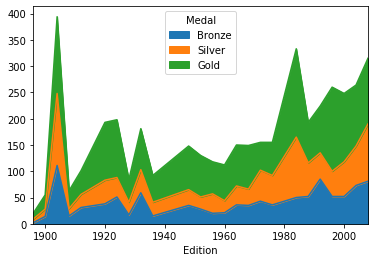

In [84]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals['Medal'], categories = ['Bronze', 'Silver', 'Gold'],\
                                    ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

--------------

# Practice Arena

In [85]:
df_dict = {'eggs': [47, 110, 221, 77, 132, 205],
      'salt': [12.0, 50.0, 89.0, 87.0, 0.0, 60.0],
      'spam': [17,31,72,20,52,55]}

df = pd.DataFrame(df_dict, index = ['jan', 'feb', 'mar', 'apr', 'may', 'jun'])
df.index.name = 'month'
df

,eggs,salt,spam
month,,,
jan,47,12.0,17
feb,110,50.0,31
mar,221,89.0,72
apr,77,87.0,20
may,132,0.0,52
jun,205,60.0,55


In [86]:
df.apply(lambda n: n // 4)
print(df.head())

       eggs  salt  spam
month                  
jan      47  12.0    17
feb     110  50.0    31
mar     221  89.0    72
apr      77  87.0    20
may     132   0.0    52


There is a trick here. Basically, the `.apply()` method works, but it does not get caught by a variable. Therefore, original `df` is the same.